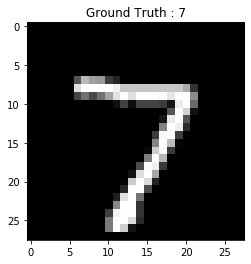

In [1]:
from keras import Sequential                             #importing all required libraries from keras
from keras.datasets import mnist                          #getting dataset from mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the testing data
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [3]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data as input data contains from 0-255
train_data /=255.0
test_data /=255.0

In [4]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
#compiling to produce nueral network with optimizer root mean square error and categorical loss property and accuracy metrics
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 1.5689 - accuracy: 0.5211 - val_loss: 0.5640 - val_accuracy: 0.8242
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.4964 - accuracy: 0.8499 - val_loss: 0.3685 - val_accuracy: 0.8919
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.3620 - accuracy: 0.8919 - val_loss: 0.3105 - val_accuracy: 0.9093
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3117 - accuracy: 0.9089 - val_loss: 0.3137 - val_accuracy: 0.9050
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2701 - accuracy: 0.9195 - val_loss: 0.2608 - val_accuracy: 0.9213
Epoch 6/20
235/235 [==============================] - 6s 25ms/step - loss: 0.2408 - accuracy: 0.9289 - val_loss: 0.2311 - val_accuracy: 0.9326
Epoch 7/20
235/235 [==============================] - 6s 24ms/step - loss: 0.2089 - accuracy: 0.9374 - val_loss: 0.2067 - val_accuracy: 0.9374

In [14]:
#evaluating model on testing data and calculating loss and accuracy of testing data
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
#evaluating model on training data and calculating loss and accuracy of training data
[train_loss, train_acc] = model.evaluate(train_data, train_labels_one_hot)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0011 - accuracy: 0.9997
Evaluation result on Train Data : Loss = 0.0010924709495157003, accuracy = 0.999666690826416


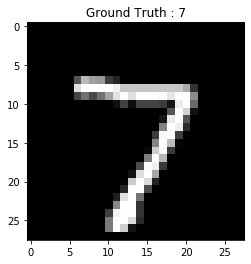

pred: [7]


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
#Q2
#predicting model on single image in test data and printing predcited value
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()
pred = model.predict_classes(test_data[[0], :])
prediction = pred[0]
print("pred:",pred)